# Black-Scholes Option Pricing

In this notebook I will go through the basics of Black-Scholes derivative pricing,
using the case of European put and call options as a simple example.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from black_scholes import call_european, put_european

%matplotlib inline

## Evolution of Stock Prices
In its basic form, Black-Scholes pricing is based on no arbitrage arguments combined with price movements that follow a geometric Brownian motion

$$ {\rm d}S_t = \mu S_t {\rm d}t + \sigma S_t {\rm d}W_t $$

where $W_t$ is a standard Wiener process, and $\mu$ and $\sigma$ are constants.  In this notebook, we will assume this model for stock prices, although it should be clear that more general modeling of stock prices is also of interest.

### Call option dependence on parameters

In the Black-Scholes model, the price of a European call option depends on:
 1. $S$ : The price of the underlying
 2. $K$ : The strike price 
 3. $\sigma$ : The volatility 
 4. $T$ : Time to expiration
 5. $r$ : Risk-free rate of return
 6. $q$ : Continuous rate of dividend returns (if at all) 
 7. Discounted value of any dividend payouts (if at all) [Not yet implemented]
 
The basic formula is
$$ c = Se^{-qT}\Phi(d_1) - Ke^{-rT}\Phi(d_2) $$

where $\Phi$ is the cumulative distribution function of the unit normal distribution
$$ \Phi(z) \equiv \int_{-\infty}^z \frac{e^{-\frac{1}{2}x^2}}{\sqrt{2\pi}} {\rm d}x $$
and
$$ d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln(S/K) + \left(r-q+\frac{\sigma^2}{2}\right)T\right] $$
$$ d_2 = \frac{1}{\sigma\sqrt{T}}\left[\ln(S/K) + \left(r-q-\frac{\sigma^2}{2}\right)T\right] = d_1 - \sigma\sqrt{T}$$

It is straightforward to see that 
 - $\Delta \equiv \frac{\partial c}{\partial S} = \Phi(d_1)$, and
 - $\Phi(d_2)$ is the probability that the option will be exercised at maturity
 
*NOTE*: When we approach maturity, we can run into numerical problems if we try to naively evaluate this expression.

For a physicist, it is natural to try and reduce the number of independent parameters this expression depends on.
In particular, note the only the parameter combinations $Se^{-qT}$, $Ke^{-rT}$ and $\sigma\sqrt{T}$ appear (ignoring dividends with a known present value).  Therefore, if we define
 - $\bar{S} \equiv Se^{-qT}$
 - $\bar{K} \equiv Ke^{-rT}$
 - $\bar{\sigma} \equiv \sigma\sqrt{T}$

we have
$$ c = \bar{S}\Phi(d_1) - \bar{K}\Phi(d_2) $$
with
$$ d_1 = \frac{1}{\bar{\sigma}}\left[\ln\left(\bar{S}/\bar{K}\right) + \frac{\bar{\sigma}^2}{2} \right] $$
$$ d_2 = \frac{1}{\bar{\sigma}}\left[\ln\left(\bar{S}/\bar{K}\right) - \frac{\bar{\sigma}^2}{2} \right] $$
which only depends on 3 independent parameters instead of 6.

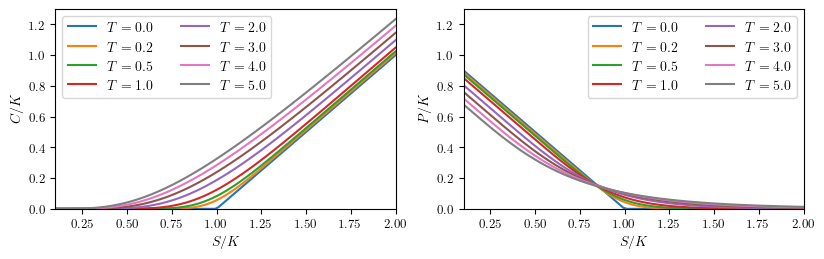

In [143]:
fig, axs = plt.subplots(ncols=2, figsize=(10,2.5))

sVals = np.linspace(0.1,2.,101)

for t in [0.,0.25, 0.5, 1., 2., 3., 4., 5.]:
    axs[0].plot(sVals, call_european(sVals, 1., 0.05, 0.25, t), label=r'$T=%.1f$' % t)
    axs[1].plot(sVals, put_european(sVals, 1., 0.05, 0.25, t, 0.), label=r'$T=%.1f$' % t)
    
axs[0].set_xlabel(r'$S/K$'); axs[0].set_ylabel(r'$C/K$')
axs[0].legend(ncols=2)

axs[1].set_xlabel(r'$S/K$'); axs[1].set_ylabel(r'$P/K$')
axs[1].legend(ncols=2)

for a_ in axs:
    a_.set_xlim(sVals[0],sVals[-1])
    a_.set_ylim(0.,1.3)

plt.show()

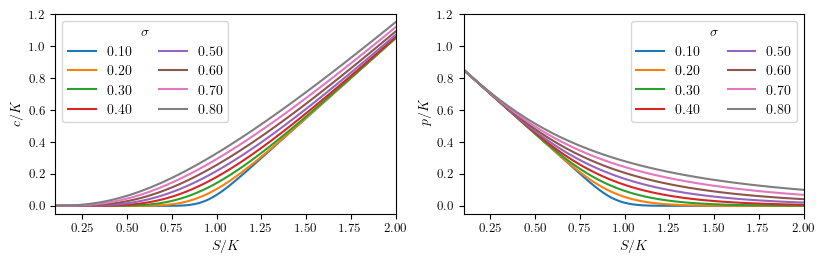

In [150]:
fig, axs = plt.subplots(ncols=2, figsize=(10,2.5))

for s in np.linspace(0.1,0.8,8):
    axs[0].plot(sVals, call_european(sVals, 1., 0.05, s, 1.), label=r'$%.2f$'%s)
    axs[1].plot(sVals, put_european(sVals, 1., 0.05, s, 1., 0.), label=r'$%.2f$'%s)
    
axs[0].set_xlabel(r'$S/K$'); axs[0].set_ylabel(r'$c/K$')
axs[1].set_xlabel(r'$S/K$'); axs[1].set_ylabel(r'$p/K$')

for a_ in axs:
    a_.set_ylim(-0.05,1.2); a_.set_xlim(sVals[0],sVals[-1])
    a_.legend(title=r'$\sigma$',ncols=2)

plt.show()

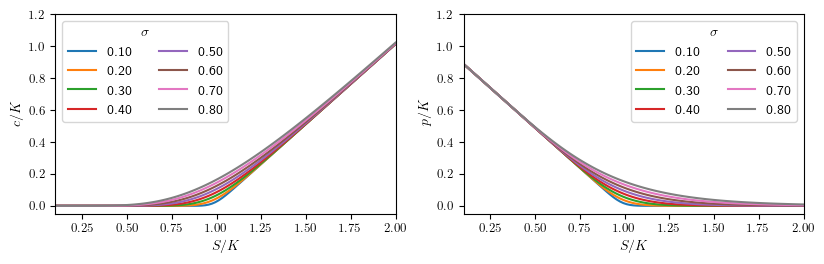

In [164]:
fig, axs = plt.subplots(ncols=2, figsize=(10,2.5))

for s in np.linspace(0.1,0.8,8):
    axs[0].plot(sVals, call_european(sVals, 1., 0.05, s, 0.25), label=r'%.2f'%s)
    axs[1].plot(sVals, put_european(sVals, 1., 0.05, s, 0.25, 0.), label=r'%.2f'%s)
    
axs[0].set_xlabel(r'$S/K$'); axs[0].set_ylabel(r'$c/K$')
axs[1].set_xlabel(r'$S/K$'); axs[1].set_ylabel(r'$p/K$')

axs[0].set_xlim(sVals[0],sVals[-1]); axs[0].set_ylim(-0.05,1.2)
axs[0].legend(title=r'$\sigma$', ncols=2)
axs[1].set_xlim(sVals[0],sVals[-1]); axs[1].set_ylim(-0.05,1.2)
axs[1].legend(title=r'$\sigma$', ncols=2)

plt.show()

In [ ]:
tVals = np.linspace(0.,5.,51)

fig, axs = plt.subplots(ncols=2, figsize=(10,2.5))



## Options Combinations (Payoffs)

In [111]:
def call_payoff(s,k):
    z = np.zeros_like(s)
    return np.max(np.vstack([s-k,z]).T,axis=-1)

def put_payoff(s,k):
    z = np.zeros_like(s)
    return np.max(np.vstack([k-s,z]).T,axis=-1)


### Bull Spread

This is useful when we expect the value of the underlying to rise, but want to limit our downside risk.  The tradeoff is that we limit our upside risk (and have to initially invest).  Therefore, we might want to do this trade if we think that an underlying is likely to experience a modest increase, but has a chance of a catastrophic decrease.

**Question**: When is it advantageous to use puts vs calls for the bull spread (assuming we can trade at the theoretical value)?

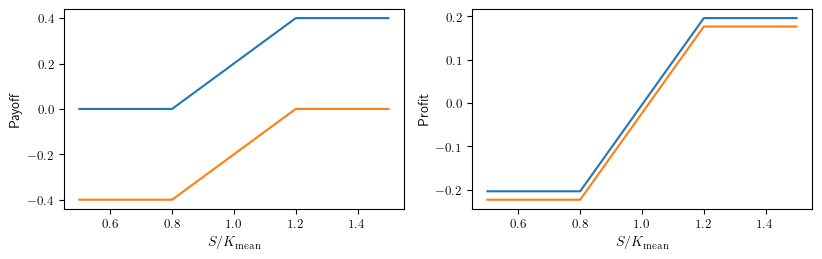

In [179]:
sVals = np.linspace(0.5,1.5,101)

c1 = call_payoff(sVals,0.8)
c2 = -call_payoff(sVals,1.2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,2.5))

axs[0].plot(sVals, c1+c2)
for a_ in axs:
    a_.set_xlabel(r'$S/K_{\rm mean}$')
axs[0].set_ylabel(r'Payoff')

p1 = put_payoff(sVals,0.8)
p2 = -put_payoff(sVals,1.2)

axs[0].plot(sVals, p1+p2)

r = 0.05
vol = 0.25
t = 1.

# Right panel shows profit / loss (including BS cost of the options)
c1_profit = c1 - call_european(1.,0.8,r,vol,t)
c2_profit = c2 + call_european(1.,1.2,r,vol,t)

p1_profit = p1 - put_european(1.,0.8,r,vol,t,0.)
p2_profit = p2 + put_european(1.,1.2,r,vol,t,0.)

axs[1].plot(sVals, c1_profit+c2_profit)
axs[1].plot(sVals, p1_profit+p2_profit)
axs[1].set_ylabel(r'Profit')

plt.show()


### Bear Spread

### Butterfly Spread

# Monte Carlo Approach

## Generating realisations of final prices
For vanilla options (which don't depend on the path history of the price), we have several choices for how we implement our Monte Carlo.  The numerically cheapest option is to simply draw samples from the final distribution.  For a geometric Brownian motion stock price paths, the resulting price distribution is log-normal, which we can easily generate through a mapping of Gaussian random deviates.

## Generating stock price paths
An alternative approach is to instead simulate the full geometric Brownian motion paths.  This method is, of course, more general as it allows us to
 - Explore more complex evolution for the prices, including cases where analytic results for the final distribution may not be known
 - Price derivatives with path-dependence in their payoff

# Integration Approach

## Numerical Quadrature

## PDE Solution